In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
plt.style.use('seaborn')
plt.style.use('dark_background')

# Loading the dataset

In [3]:
population = pd.read_csv('Weights/population.csv')
moreThan50k = pd.read_csv('Weights/more_than_50k.csv')

# Handling population.csv file

## 1. Preprocessing

In [4]:
population.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [6]:
population.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


### 1.1 Replacing missing data with NaN

In [7]:
population.loc[8, 'GRINST']

' Not in universe'

In [8]:
for i in population.columns:
    if population[i].dtype != 'int64':
        population[i] = population[i].str.strip()

In [9]:
population.loc[8]

AAGE                                       47
ACLSWKR                      Local government
ADTIND                                     43
ADTOCC                                     26
AHGA               Some college but no degree
AHRSPAY                                   876
AHSCOL                        Not in universe
AMARITL       Married-civilian spouse present
AMJIND                              Education
AMJOCC         Adm support including clerical
ARACE                                   White
AREORGN                             All other
ASEX                                   Female
AUNMEM                                     No
AUNTYPE                       Not in universe
AWKSTAT                   Full-time schedules
CAPGAIN                                     0
CAPLOSS                                     0
DIVVAL                                      0
FILESTAT                  Joint both under 65
GRINREG                       Not in universe
GRINST                        Not 

In [10]:
population = population.replace('?', np.NaN)

In [11]:
columns = []
percentageOfNan = []
colsToRemove = []
for i in population.columns:
    columns.append(i)
    percentageOfNan.append(population[i].isnull().sum()*100/population.shape[0])
    if percentageOfNan[-1] > 40:
        colsToRemove.append(i)

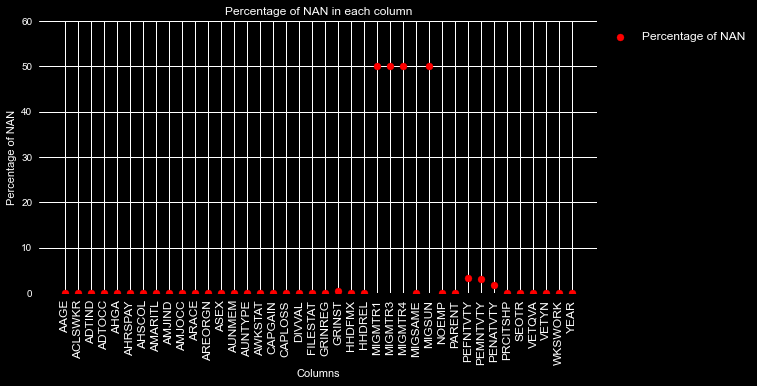

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(columns, percentageOfNan, color='red', marker='o', label='Percentage of NAN')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, 60, 10)
plt.xlabel('Columns')
plt.ylabel('Percentage of NAN')
plt.title('Percentage of NAN in each column')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


In [13]:
len(population.columns)

40

In [14]:
colsToRemove

['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [15]:
preprocessedPopulation = population.drop(colsToRemove, axis=1)

In [16]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 2. Feature Analysis

### 2.1 Histogram of values of each feature

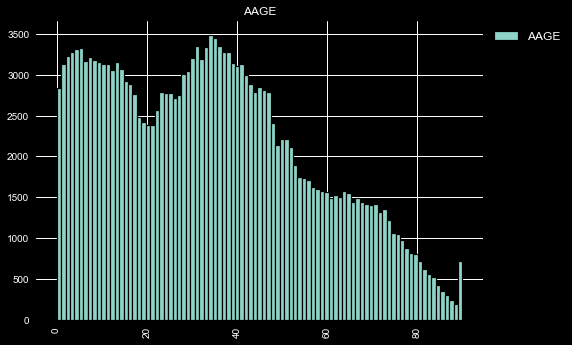

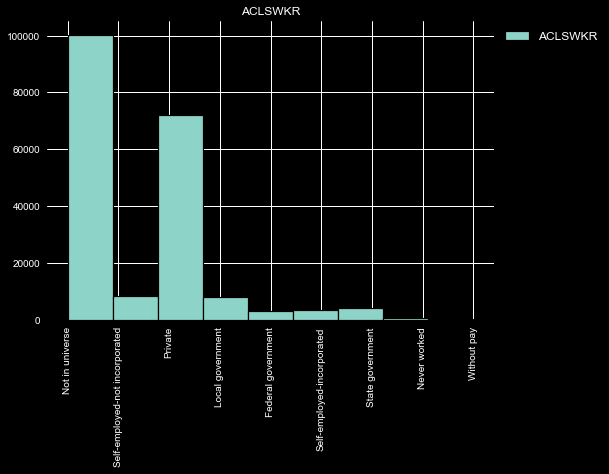

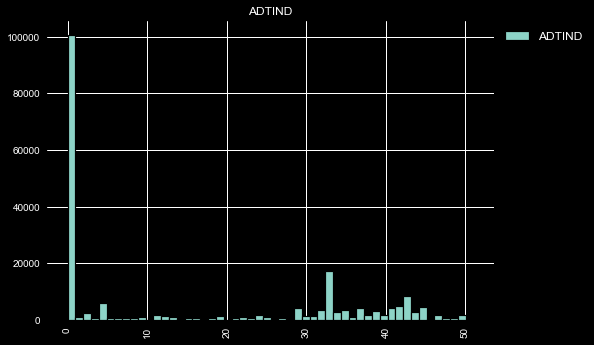

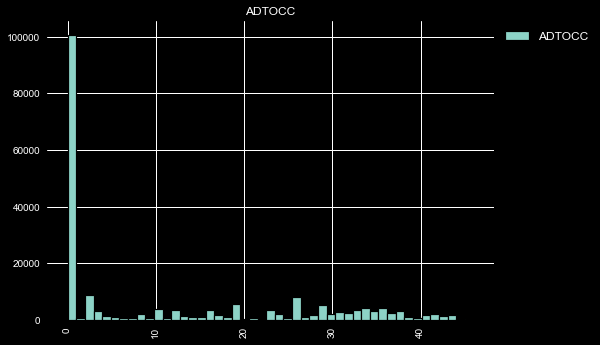

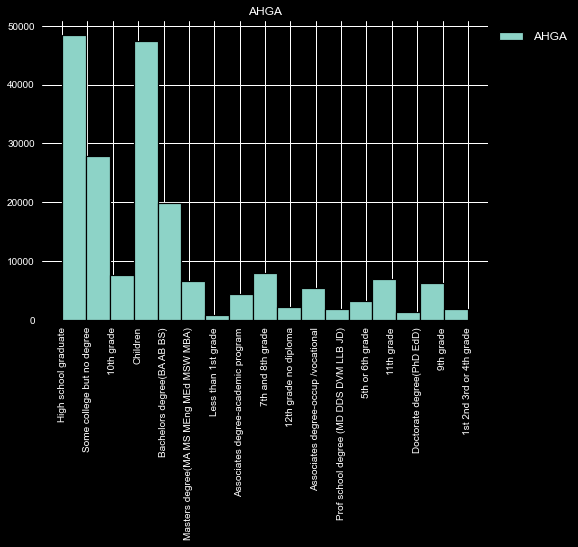

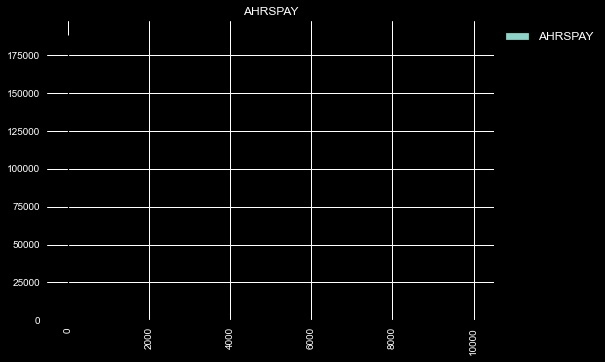

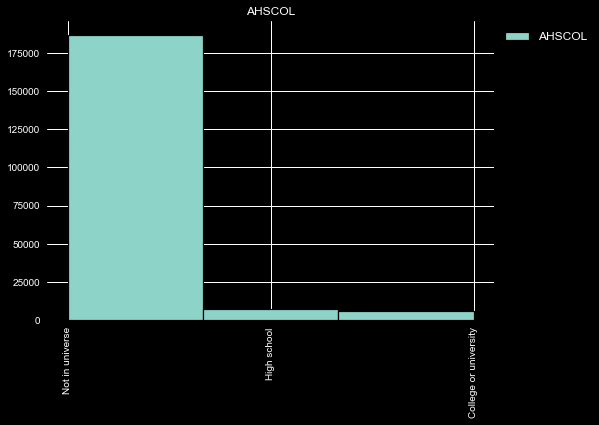

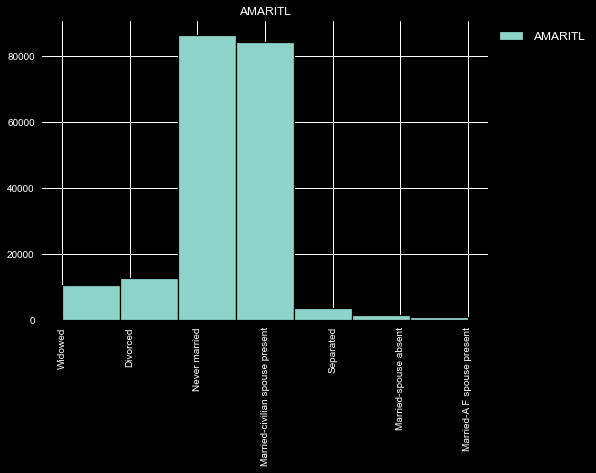

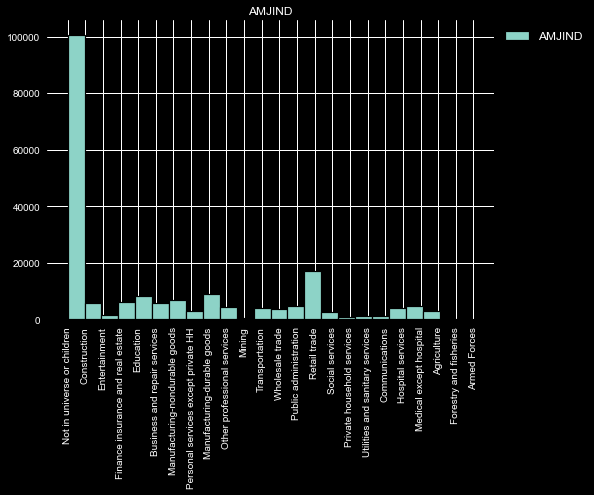

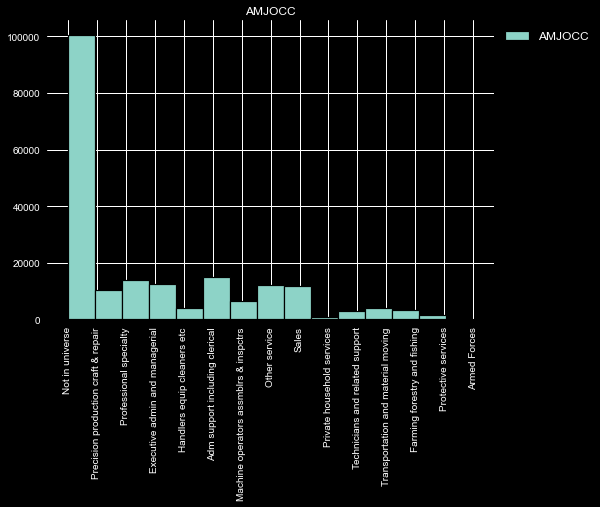

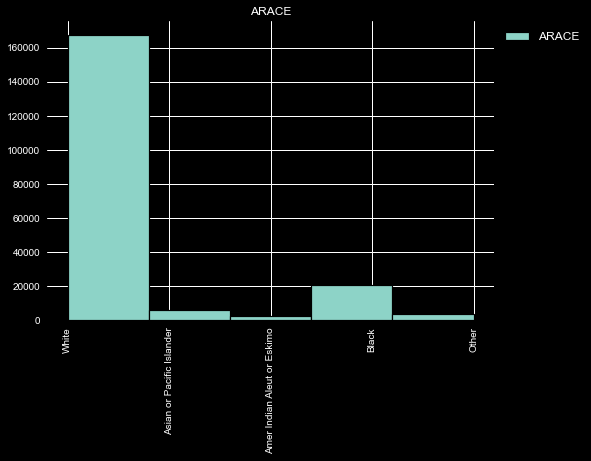

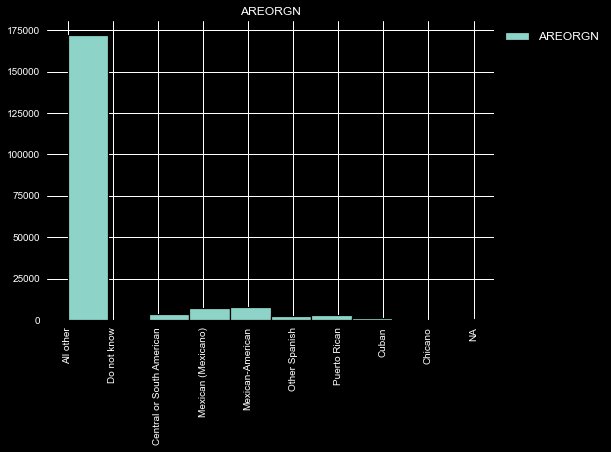

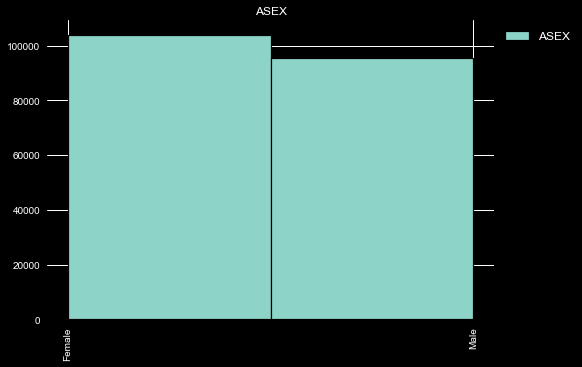

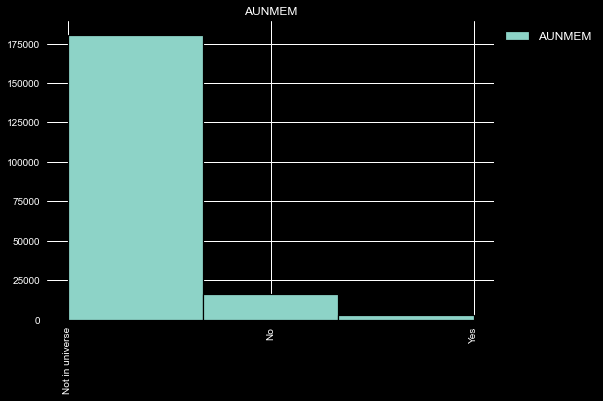

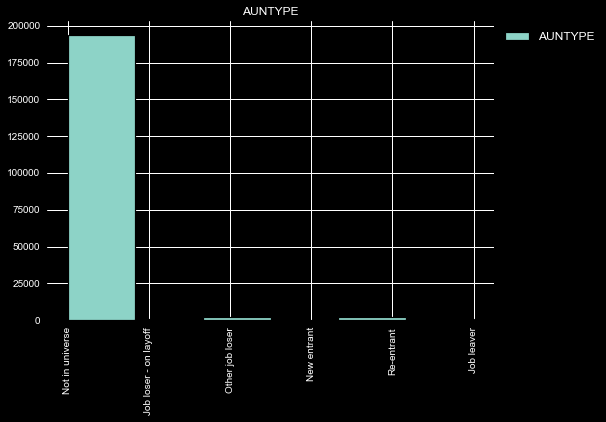

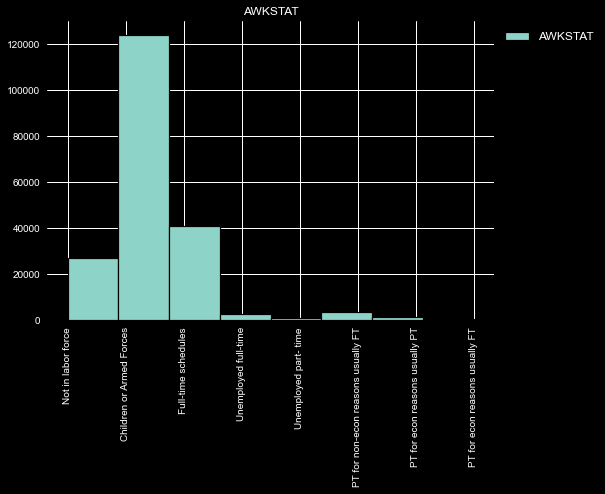

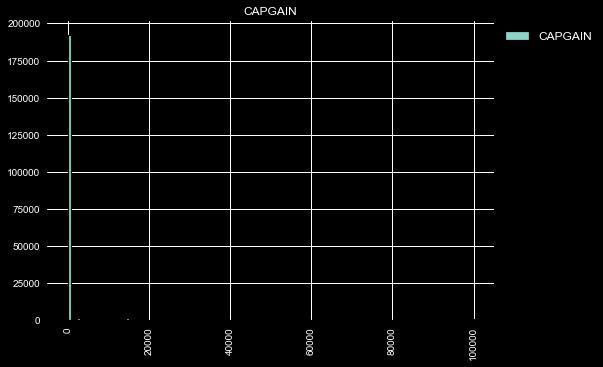

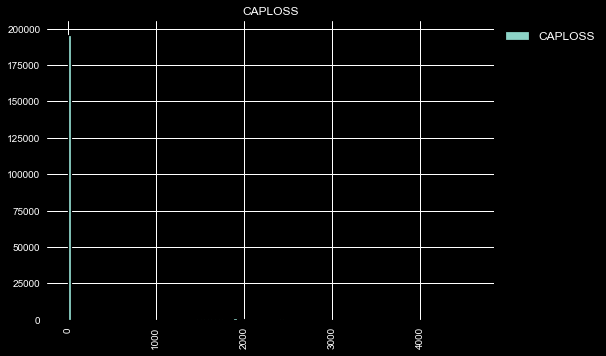

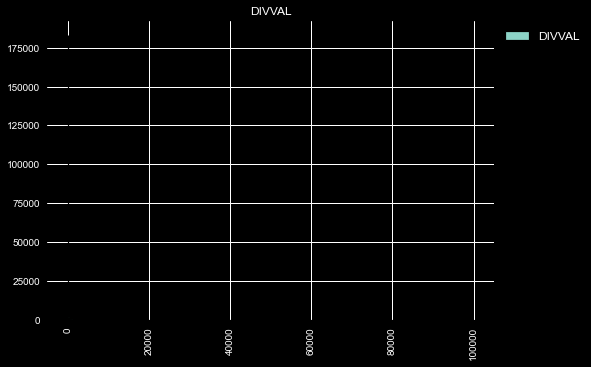

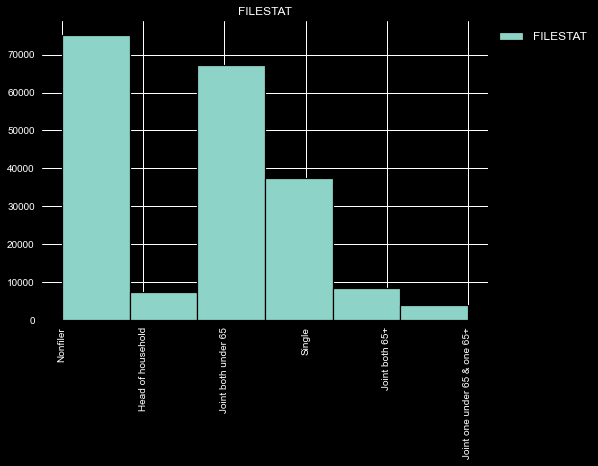

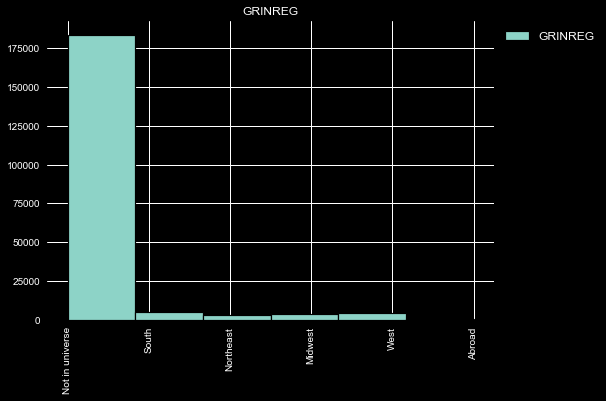

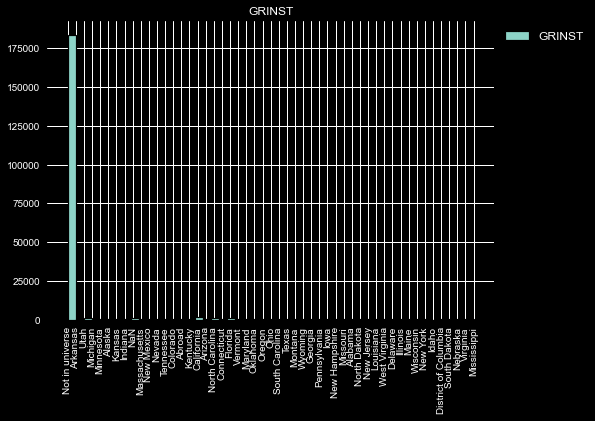

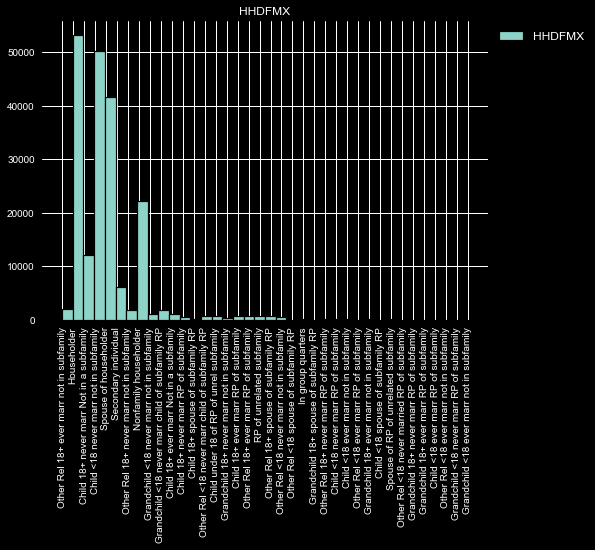

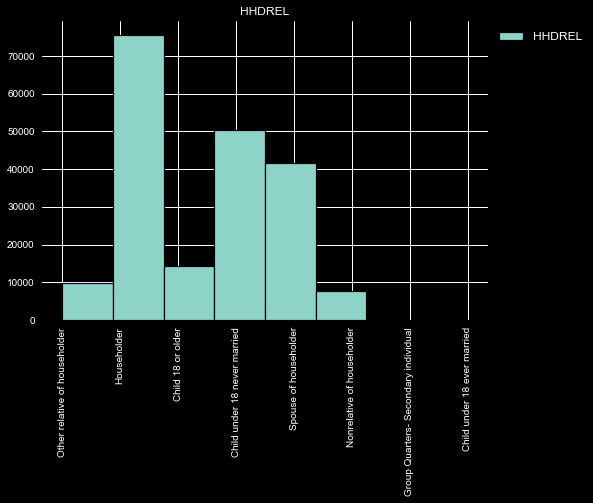

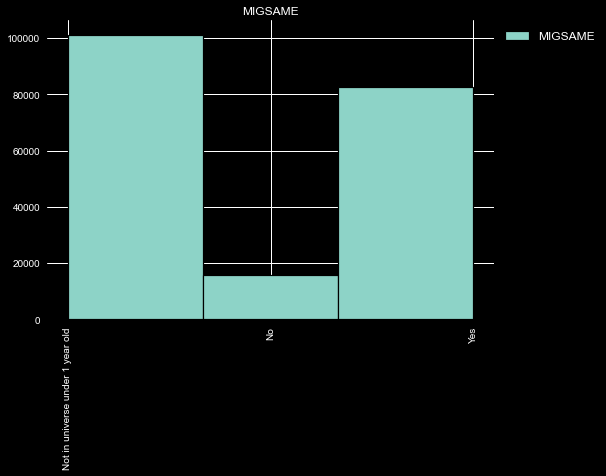

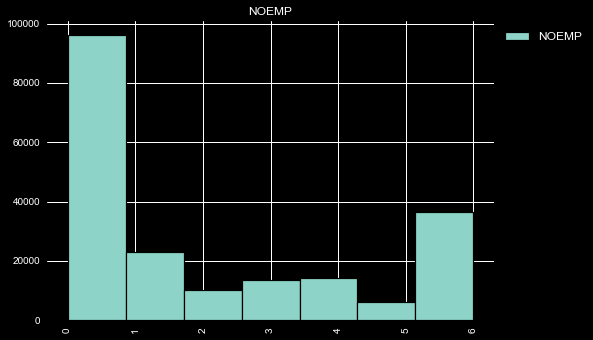

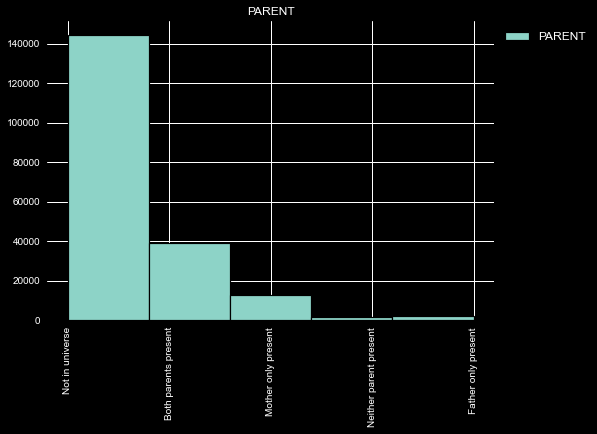

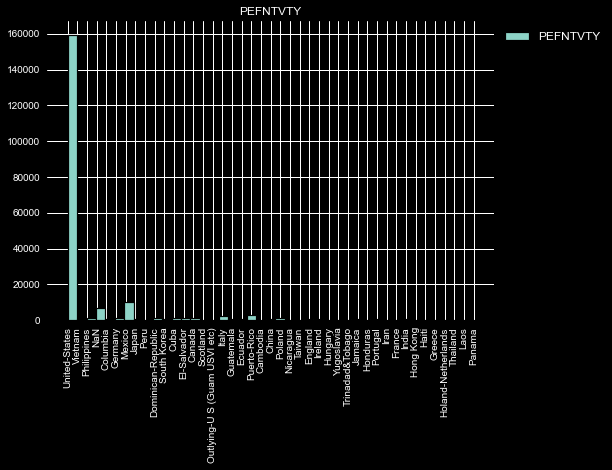

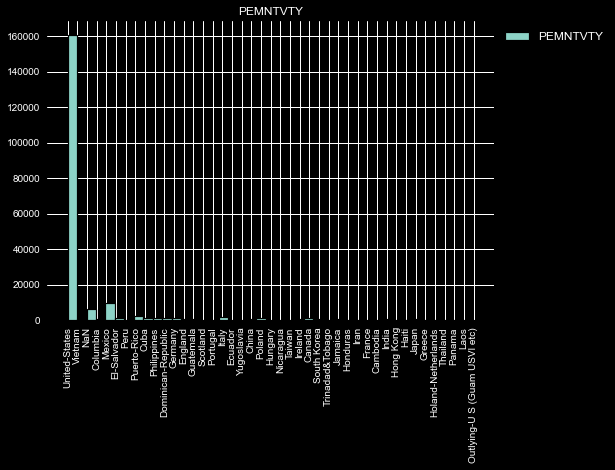

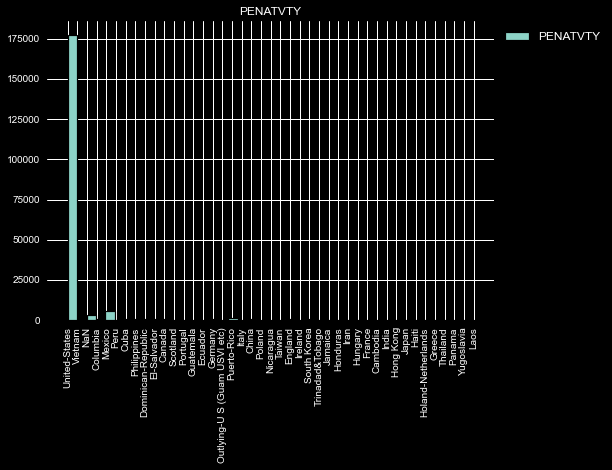

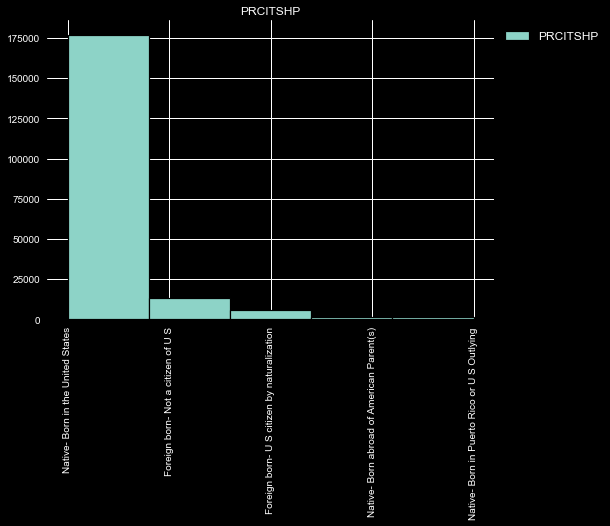

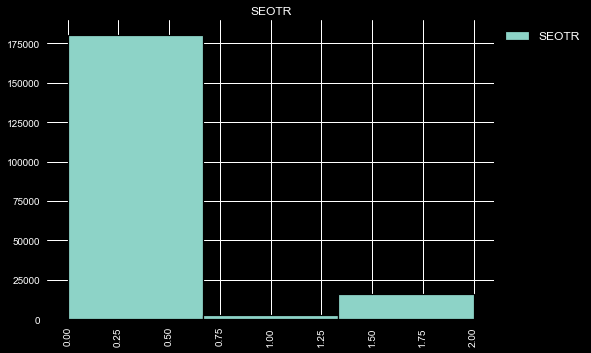

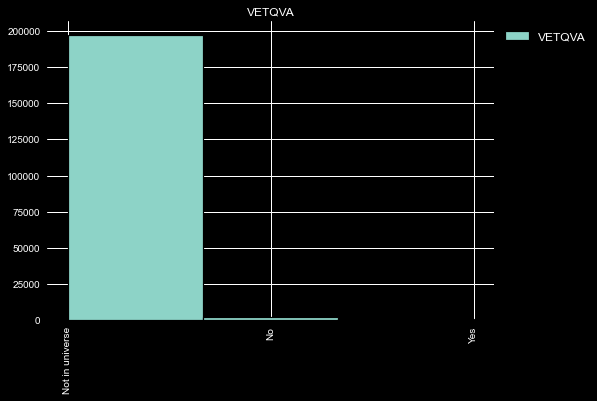

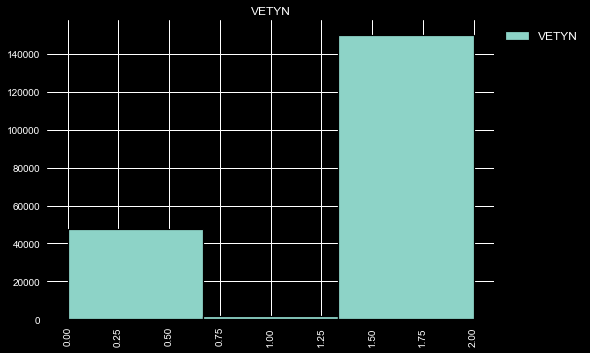

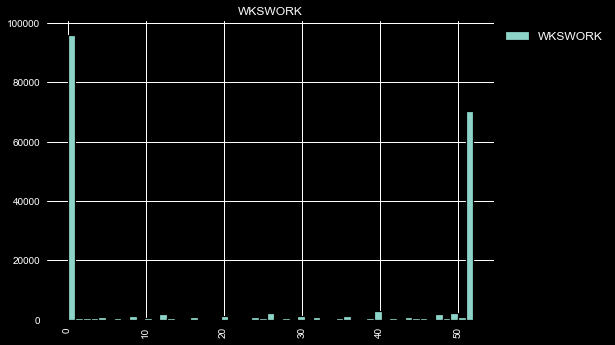

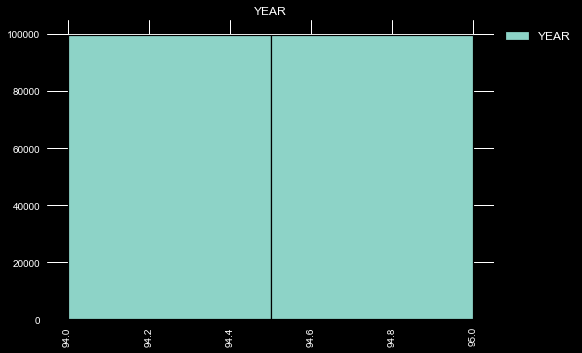

In [216]:
# fig = plt.figure(figsize=(40, 90))
# row = 4
# col = 9
# plotNo = 2
for j in range(len(preprocessedPopulation.columns)):
    # if plotNo == 10:
        # break
    # if i != 'GRINST' and i != 'PEFNTVTY' and i != 'PEMNTVTY' and i != 'PENATVTY':
    # print(i)
    i = preprocessedPopulation.columns[j]
    plt.hist(preprocessedPopulation[i].replace(np.NaN, 'NaN'), bins=len(preprocessedPopulation[i].unique()), label=i, edgecolor='black', linewidth=1.2, histtype='barstacked')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.title(i)
    # fig.add_subplot(col, row, plotNo)
    # plotNo += 1
    # col += 1
    # if col == 9:
    #     col = 0
    #     row += 1
    plt.show()


### 2.2 Removing the columns where one value dominates over other

In [17]:
imbalancedCols = []
for i in tqdm(range(len(preprocessedPopulation.columns))):
    col = preprocessedPopulation.columns[i]
    valCounts = list(preprocessedPopulation[col].value_counts().sort_values(ascending=False))
    if len(valCounts) == 1:
        imbalancedCols.append(col)
    elif valCounts[0] - valCounts[1] > 0.7*np.sum(valCounts):
        imbalancedCols.append(col)

100%|██████████| 36/36 [00:02<00:00, 14.50it/s]


In [18]:
imbalancedCols

['AHRSPAY',
 'AHSCOL',
 'ARACE',
 'AREORGN',
 'AUNMEM',
 'AUNTYPE',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'GRINREG',
 'GRINST',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'SEOTR',
 'VETQVA']

In [19]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [20]:
preprocessedPopulation.drop(imbalancedCols, axis=1, inplace=True)


In [21]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 3. Imputation, Bucketization and One Hot Encoding

### 3.1 Replacing missing data with mode

In [22]:
globalModeDict = {}

In [23]:
for i in preprocessedPopulation.columns:
    globalModeDict[i] = preprocessedPopulation[i].mode()[0]

In [24]:
for i in preprocessedPopulation.columns:
    preprocessedPopulation[i] = preprocessedPopulation[i].replace(np.NaN, globalModeDict[i])

### 3.2 Bucketization of the data

In [25]:
for i in preprocessedPopulation.columns:
    if preprocessedPopulation[i].dtype == 'int64' and len(preprocessedPopulation[i].unique()) > 6:
        finalbins = np.linspace(preprocessedPopulation[i].min(), preprocessedPopulation[i].max(), 6)
        finalLabels = []
        for j in range(0, len(finalbins)-1):
            # finalLabels.append((finalbins[j] + finalbins[j+1])/2)
            finalLabels.append(str(int(finalbins[j])) + '-' + str(int(finalbins[j+1])))
        preprocessedPopulation[i] = pd.cut(preprocessedPopulation[i], bins=finalbins, labels=finalLabels)

In [26]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   AAGE      196684 non-null  category
 1   ACLSWKR   199523 non-null  object  
 2   ADTIND    98839 non-null   category
 3   ADTOCC    98839 non-null   category
 4   AHGA      199523 non-null  object  
 5   AMARITL   199523 non-null  object  
 6   AMJIND    199523 non-null  object  
 7   AMJOCC    199523 non-null  object  
 8   ASEX      199523 non-null  object  
 9   AWKSTAT   199523 non-null  object  
 10  FILESTAT  199523 non-null  object  
 11  HHDFMX    199523 non-null  object  
 12  HHDREL    199523 non-null  object  
 13  MIGSAME   199523 non-null  object  
 14  NOEMP     103540 non-null  category
 15  PARENT    199523 non-null  object  
 16  VETYN     199523 non-null  int64   
 17  WKSWORK   103540 non-null  category
 18  YEAR      199523 non-null  int64   
dtypes: category(5), int64(2

### 3.3 One Hot Encoding All the Features

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
oht = OneHotEncoder(sparse=True)

In [29]:
# # temp = pd.get_dummies(preprocessedPopulation['AAGE'], sparse=True, drop_first=False
# # columns=preprocessedPopulation['AAGE'].unique()
# # )
# for i in preprocessedPopulation.columns:
#     preprocessedPopulation[i] = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)

In [30]:
preprocessedPopulation['AAGE'].value_counts()

0-18     55637
18-36    53032
36-54    47816
54-72    27390
72-90    12809
Name: AAGE, dtype: int64

In [31]:
preprocessedPopulation['AAGE']

0         72-90
1         54-72
2          0-18
3          0-18
4          0-18
          ...  
199518    72-90
199519    54-72
199520    36-54
199521     0-18
199522    18-36
Name: AAGE, Length: 199523, dtype: category
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [32]:
finalPopulationData = pd.DataFrame()

In [33]:
for itr in tqdm(range(len(preprocessedPopulation.columns))):
    i = preprocessedPopulation.columns[itr]
    ohtVector = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)
    for j in ohtVector.columns:
        finalPopulationData[str(i) + '_' + str(j)] = ohtVector[j]

100%|██████████| 19/19 [00:04<00:00,  4.42it/s]


In [34]:
finalPopulationData.head()

,AAGE_0-18,AAGE_18-36,AAGE_36-54,AAGE_54-72,AAGE_72-90,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_Never worked,ACLSWKR_Not in universe,ACLSWKR_Private,...,VETYN_0,VETYN_1,VETYN_2,WKSWORK_0-10,WKSWORK_10-20,WKSWORK_20-31,WKSWORK_31-41,WKSWORK_41-52,YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [35]:
finalPopulationData.shape

(199523, 172)

## 4. Clustering

### Applying K-Medians Clustering

In [357]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer

In [361]:
initCenter = []
for i in range(10):
    initCenter.append(finalPopulationData.sample(n=1).iloc[0])
kmed = kmedians(data=finalPopulationData, number_clusters=10, initial_medians=initCenter)

In [362]:
kmed.process()

In [36]:
k = 5
colors = ['green', 'red', 'blue', 'yellow', 'orange']
clusters = {}
for i in range(k):
    # step 1: randomly initialize the centroids
    # initialize random centroids for each cluster
    center = 10*(2*np.random.random((finalPopulationData.shape[1],)) - 1)
    # assignment list for each cluster
    points = []
    # cluster dictionary stores the centroids, the colour assigned and the points assigned to each cluster
    cluster = {}
    cluster['center'] = center
    cluster['color'] = colors[i]
    cluster['points'] = points
    clusters[i] = cluster


In [37]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [44]:
def assignPointsToClosestCluster(clusters, X):
    for ix in tqdm(range(X.shape[0])):
        dist = []
        currX = X[ix]
        for kx in range(k):
            d = distance(currX, clusters[kx]['center'])
            dist.append(d)
        currCluster = np.argmin(dist)
        clusters[currCluster]['points'].append(currX)

In [45]:
def updateClusterCenter(clusters):
    for kx in tqdm(range(k)):
        points = np.array(clusters[kx]['points'])
        if len(points) == 0:
            continue
        # only update the cluster center if there are points assigned to the cluster
        newCenter = np.mean(points, axis=0)
        # update the cluster center
        clusters[kx]['center'] = newCenter
        # clear the points assigned to the cluster
        clusters[kx]['points'] = []

In [46]:
def plotClusters(clusters):
    for kx in clusters:
        # print(clusters[kx]['points'])
        # print(type(clusters[kx]['points']))
        # print(len(clusters[kx]['points']))
        pts = np.array(clusters[kx]['points'])
        # plot the points
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c=clusters[kx]
                        ['color'], marker='.')
        except:
            # the code will come here when there are no points in a cluster
            pass
        # plot the centroids
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], c='black', marker='*')
    plt.grid(True)
    plt.show()

In [47]:
finalPopulationData.shape

(199523, 172)

In [48]:
assignPointsToClosestCluster(clusters, finalPopulationData.values)

100%|██████████| 199523/199523 [00:39<00:00, 5049.98it/s]


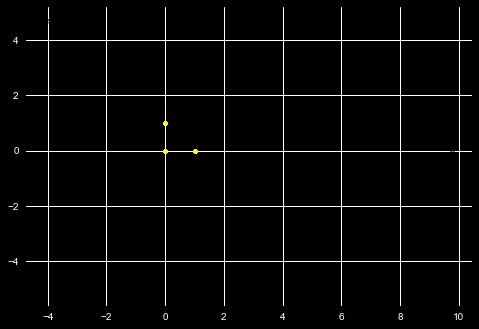

In [49]:
plotClusters(clusters)